In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = "C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

# 음수지원
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

In [5]:
pre = pd.read_csv("data/pre_train.csv", encoding = "euc-kr")
pre.head()
pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2869 entries, 0 to 2868
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2869 non-null   int64  
 1   단지코드        2869 non-null   object 
 2   총세대수        2869 non-null   int64  
 3   임대건물구분      2869 non-null   object 
 4   지역          2869 non-null   object 
 5   전용면적        2869 non-null   float64
 6   전용면적별세대수    2869 non-null   int64  
 7   빈집          2869 non-null   float64
 8   임대료         2300 non-null   object 
 9   노선수         2869 non-null   float64
 10  버스          2869 non-null   float64
 11  주차면수        2869 non-null   float64
 12  등록차량수       2869 non-null   float64
dtypes: float64(6), int64(3), object(4)
memory usage: 291.5+ KB


In [6]:
pre.drop("Unnamed: 0", axis = 1, inplace = True)
pre.head()

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수,등록차량수
0,C2515,545,아파트,경상남도,33.48,276,17.0,82940,0.0,3.0,624.0,205.0
1,C2515,545,아파트,경상남도,39.60,60,17.0,107130,0.0,3.0,624.0,205.0
2,C2515,545,아파트,경상남도,39.60,20,17.0,107130,0.0,3.0,624.0,205.0
3,C2515,545,아파트,경상남도,46.90,38,17.0,149760,0.0,3.0,624.0,205.0
4,C2515,545,아파트,경상남도,46.90,19,17.0,149760,0.0,3.0,624.0,205.0


#### '임대료'의 경우 결측치가 있어서 빼고 진행
#### 문자열 데이터인 '단지코드', '임대건물구분', '지역' 제외하고 진행

In [7]:
pre.drop(["임대료", "단지코드", "임대건물구분", "지역"], axis = 1, inplace = True)
pre.head()

,총세대수,전용면적,전용면적별세대수,빈집,노선수,버스,주차면수,등록차량수
0,545,33.48,276,17.0,0.0,3.0,624.0,205.0
1,545,39.60,60,17.0,0.0,3.0,624.0,205.0
2,545,39.60,20,17.0,0.0,3.0,624.0,205.0
3,545,46.90,38,17.0,0.0,3.0,624.0,205.0
4,545,46.90,19,17.0,0.0,3.0,624.0,205.0


In [8]:
pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2869 entries, 0 to 2868
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   총세대수      2869 non-null   int64  
 1   전용면적      2869 non-null   float64
 2   전용면적별세대수  2869 non-null   int64  
 3   빈집        2869 non-null   float64
 4   노선수       2869 non-null   float64
 5   버스        2869 non-null   float64
 6   주차면수      2869 non-null   float64
 7   등록차량수     2869 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 179.4 KB


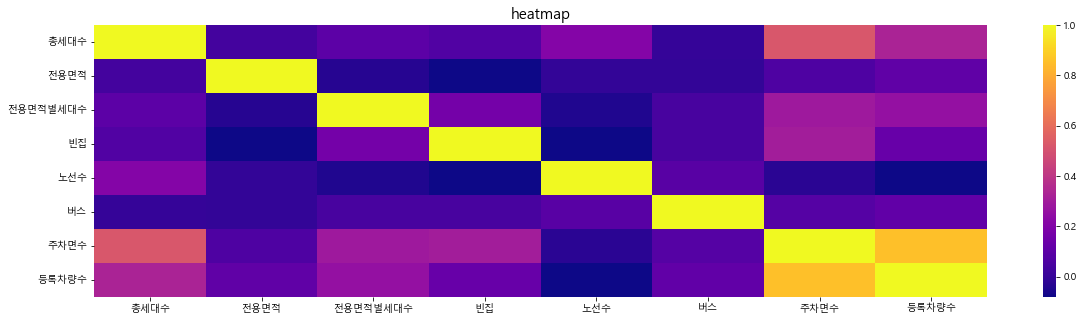

In [9]:
plt.figure(figsize=(20,5))
hmap = sns.heatmap(pre.corr(), cmap = 'plasma')
hmap.set_title("heatmap", fontsize=15)
plt.show()